In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 随机数种子
torch.manual_seed(2333)

# 定义超参数
num_samples = 20 # 样本数
hidden_size = 200 # 隐藏层大小
num_epochs = 500  # 训练轮数

### 数据生成

In [16]:
x_train = torch.unsqueeze(torch.linspace(-1, 1, num_samples), 1)
y_train = x_train + 0.3 * torch.randn(num_samples, 1)

x_test = torch.unsqueeze(torch.linspace(-1, 1, num_samples), 1)
y_test = x_test + 0.3 * torch.randn(num_samples, 1)

### 绘制训练集和测试集

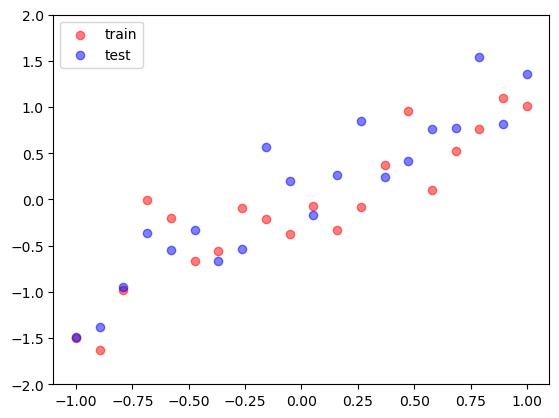

In [20]:
plt.scatter(x_train, y_train, c='r', alpha=0.5, label='train')
plt.scatter(x_test, y_test, c='b', alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2, 2))
plt.show()

### 定义模型

In [22]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
)

net_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_size),
    torch.nn.Dropout(0.5),  # p=0.5
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.Dropout(0.5),  # p=0.5
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
)

### 模型训练

In [24]:
optimizer_overfitting = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_dropout = torch.optim.Adam(net_dropout.parameters(), lr=0.01)

criterion = nn.MSELoss()

for i in range(num_epochs):
     # overfitting的网络：预测、损失函数、反向传播
    pred_overfitting = net_overfitting(x_train)
    loss_overfitting = criterion(pred_overfitting, y_train)
    optimizer_overfitting.zero_grad()
    loss_overfitting.backward()
    optimizer_overfitting.step()
    
    # 包含dropout的网络：预测、损失函数、反向传播
    pred_dropout = net_dropout(x_train)
    loss_dropout = criterion(pred_dropout, y_train)
    optimizer_dropout.zero_grad()
    loss_dropout.backward()
    optimizer_dropout.step()

### 测试和可视化

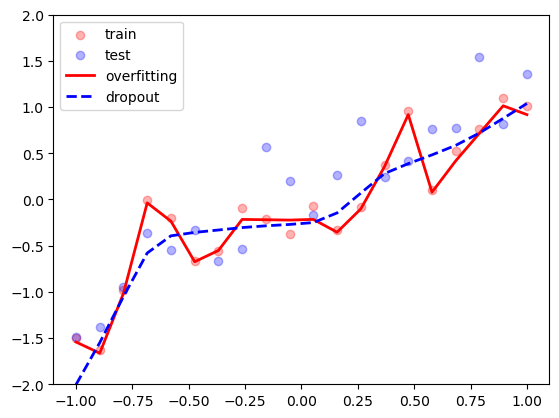

In [42]:
net_overfitting.eval()
net_dropout.eval()

test_pred_overfitting = net_overfitting(x_test)
test_pred_dropout = net_dropout(x_test)

plt.scatter(x_train, y_train, c="r", alpha=0.3, label='train')
plt.scatter(x_test, y_test, c='b', alpha=0.3, label='test')
plt.plot(x_test, test_pred_overfitting.data.numpy(), 'r-', lw=2, label='overfitting')
plt.plot(x_test, test_pred_dropout.data.numpy(), 'b--', lw=2, label='dropout')
plt.legend(loc='upper left')
plt.ylim((-2, 2))
plt.show()